Script for assessing validity of cloud masks, outputting csv of usable patches for training/validation

In [1]:
data_dir = 'C:/Data/eo4ai/raw/S2-Sinergise-Test/'
out_dir  = 'C:/Data/eo4ai/processed/S2-Sinergise-Test/'

In [2]:
import numpy as np
import gzip
import os
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pprint
import pickle

In [3]:
def get_scenes(data_dir):
    scenes = []
    for root,dirs,paths in os.walk(data_dir):
        for _dir in dirs:
            if 'eopatch' in _dir:
                scenes.append(os.path.join(root,_dir))
    return scenes


def load_data(scene):
    with gzip.open(os.path.join(scene,'data','BANDS.npy.gz')) as f:
        bands = np.load(f)
    with gzip.open(os.path.join(scene,'data','CLP.npy.gz')) as f:
        CLP = np.load(f)
    with gzip.open(os.path.join(scene,'mask','CLM.npy.gz')) as f:
        CLM = np.load(f)
    with gzip.open(os.path.join(scene,'mask','IS_DATA.npy.gz')) as f:
        IS_DATA = np.load(f)
#     with gzip.open(os.path.join(scene,'meta_info.pkl.gz')) as f:
#         meta_info = pickle.load(f)
    return bands,CLP,CLM,IS_DATA

def load_scenes(scenes):
    bands = []
    CLPs = []
    CLMs = []
    IS_DATAs = []
    for scene in scenes:
        band,CLP,CLM,IS_DATA = load_data(scene)
        print(band.shape,CLP.shape,CLM.shape,IS_DATA.shape)
        if band.shape[0] == 1 and CLP.shape[0]== 1 and CLM.shape[0]== 1 and IS_DATA.shape[0]== 1:
            bands.append(band)
            CLPs.append(CLP)
            CLMs.append(CLM)
            IS_DATAs.append(IS_DATA)
    
    bands = np.stack(bands,axis=0)
    CLPs = np.stack(CLPs,axis=0)
    CLMs = np.stack(CLMs,axis=0)
    IS_DATAs = np.stack(IS_DATAs,axis=0)
    return bands,CLPs,CLMs,IS_DATAs

In [4]:
a = get_scenes(data_dir)
bands,CLPs,CLMs,IS_DATAs = load_scenes(a)

(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1) (1, 512, 512, 1) (1, 512, 512, 1)
(1, 512, 512, 13) (1, 512, 512, 1)

In [5]:
bands.shape, CLPs.shape, CLMs.shape, IS_DATAs.shape

((47, 1, 512, 512, 13),
 (47, 1, 512, 512, 1),
 (47, 1, 512, 512, 1),
 (47, 1, 512, 512, 1))

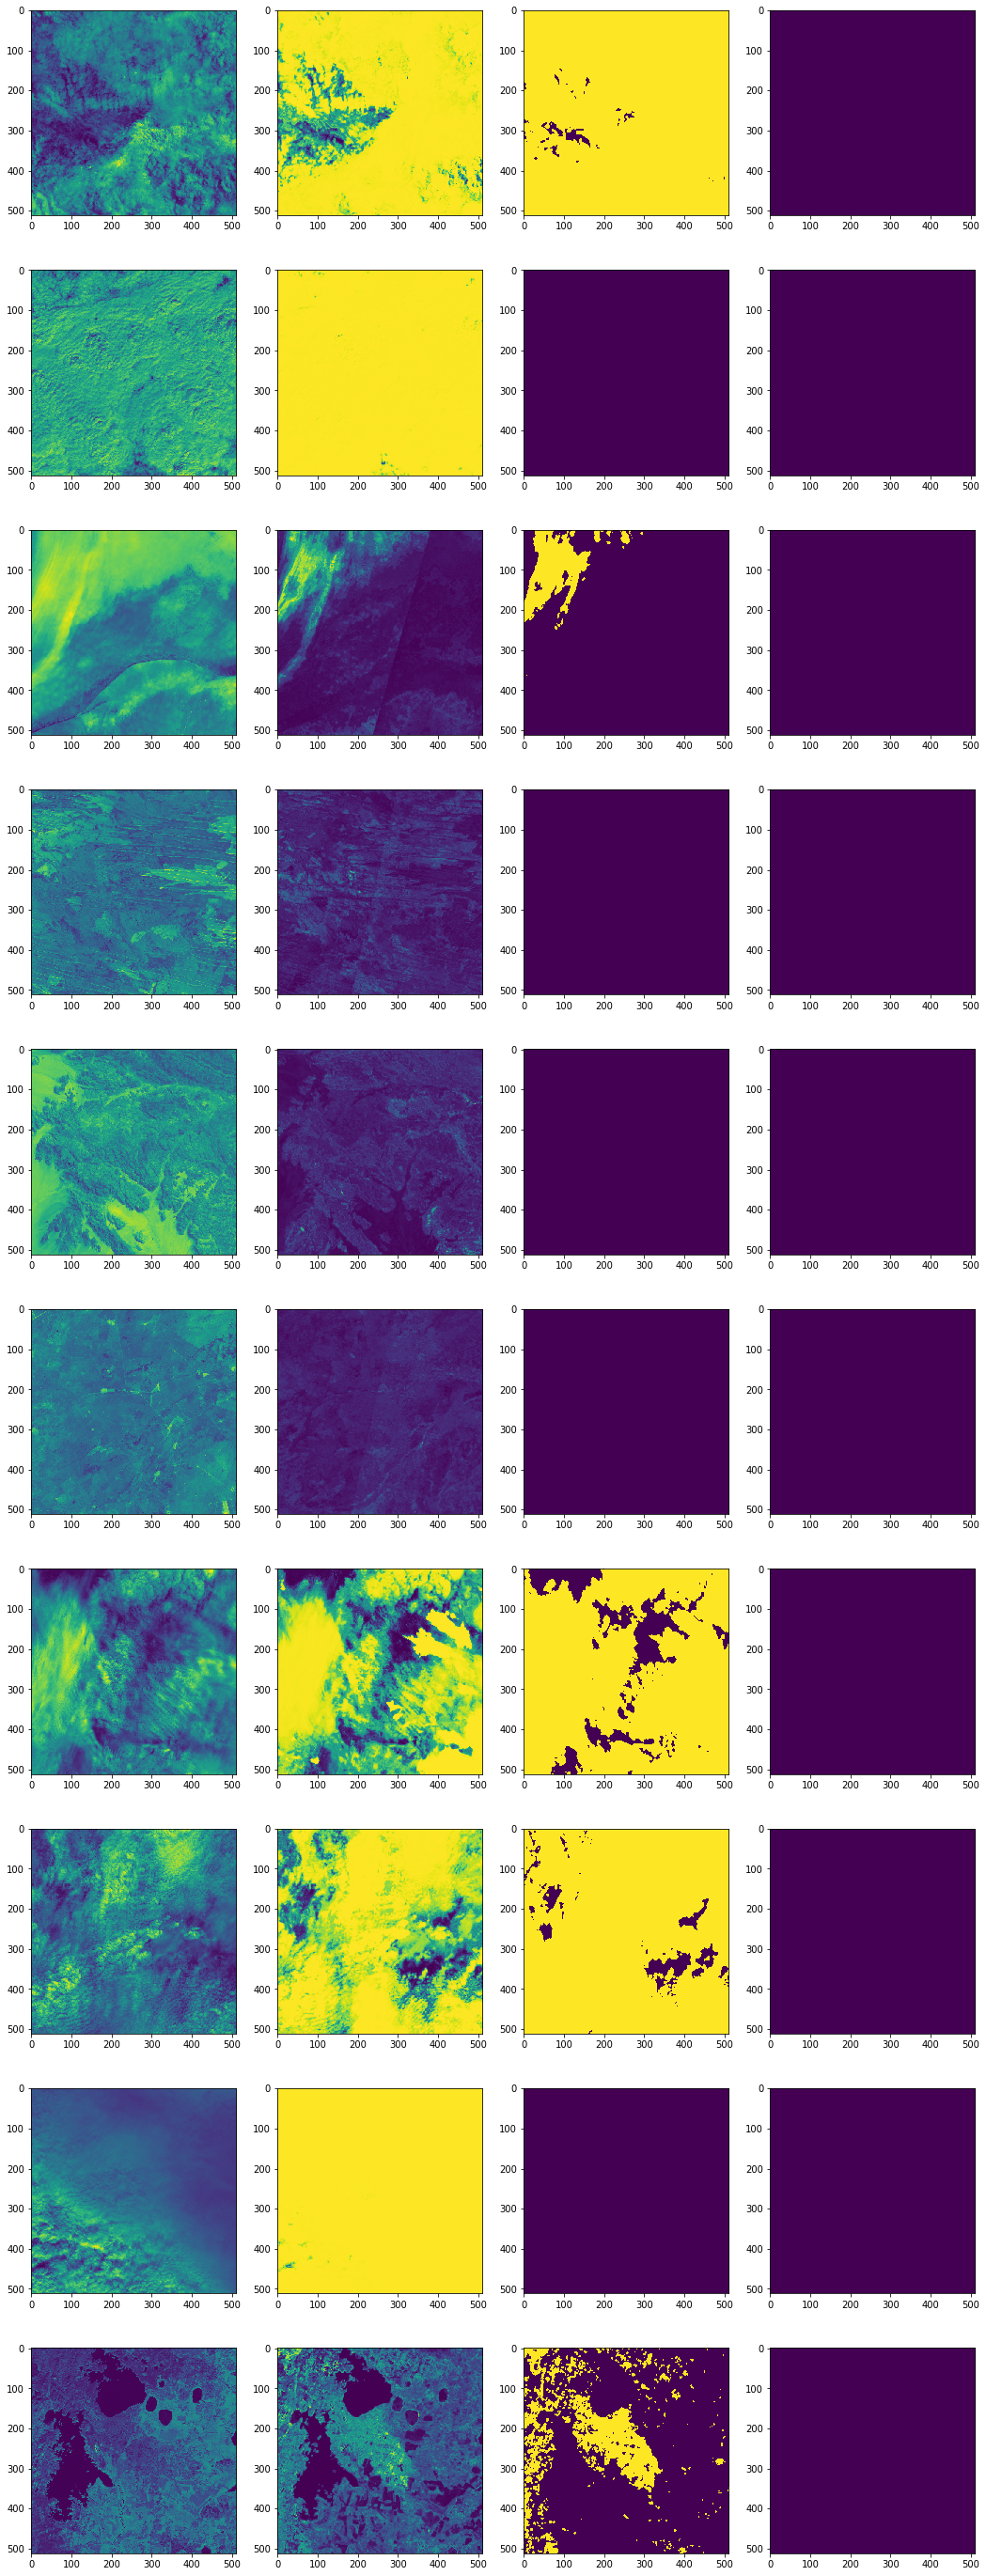

In [30]:
num = 10
fig,ax = plt.subplots(num,4,figsize=(18,50))

for i in range(num):
    ax[i,0].imshow(np.squeeze(1.5*bands[30+i,...,11]))
    ax[i,1].imshow(np.squeeze(CLPs[30+i,...]))
    ax[i,2].imshow(np.squeeze(CLMs[30+i,...]))
    ax[i,3].imshow(np.squeeze(IS_DATAs[30+i,...]))

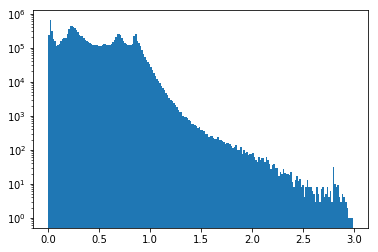

In [27]:
plt.hist(bands[...,8].ravel(),bins=200,log=True);